In [63]:
import numpy as np
import pandas as pd
# import sklearn.model_selection
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
# from sklearn import preprocessing
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from sklearn.decomposition import PCA
import sklearn.decomposition

import pickle
from IPython.core.display import HTML
#import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from collections import OrderedDict
%matplotlib inline

<div class="span5 alert alert-info">
<h2>Notebook details</h2>

<p> This notebook is for <b>Cluesting</b> for <b>Mortagage custome segementation</b> project.</p>

<p> Notes.</p>
<ol>
<li>Perform baseline analysis </li>
<li>Perform feature important analysis </li>
<li>Perform multiple runs for training and test data to understand variation in accuracy </li>
<li> Apply K Mean clustering algorithm to the data
<!--     <ul>
     <li>Extract Confusion matrix for logistic regression </li>
     <li>Extract classification report for logistic regression </li>
    </ul> -->
</li>        
</ol>
</div>

In [19]:
# setting some initial values and reading data from pickle file
pd.set_option('display.max_colwidth', -1)
color_success='#00ff66'#kickstarter green#'#2BDE73'
color_fail='#FF192F'#'#FFC7CE'#'#FFC7CE'#'#FF0000' # red
stateSuccess='Successful'
stateFail='Failed'
css = open('style/style-table.css').read() + open('style/style-notebook.css').read()
cssAnalysis = '.analysis {background:#5bffc0; }' 
HTML('<style>{} {}</style>'.format(css,cssAnalysis))
pickle_file='df_selectdata_ML.sa'
df_selectdata = pickle.load( open( pickle_file, "rb" ) )
#df_final_months.info()
#df_final_months.head()

In [21]:
#df_selectdata.info()
len(df_selectdata)

31630026

## Helper methods

In [71]:
for col in df_filterdata:
    print(col)

index
Result
StateCode_1.0
StateCode_2.0
StateCode_4.0
StateCode_5.0
StateCode_6.0
StateCode_8.0
StateCode_9.0
StateCode_10.0
StateCode_11.0
StateCode_12.0
StateCode_13.0
StateCode_15.0
StateCode_16.0
StateCode_17.0
StateCode_18.0
StateCode_19.0
StateCode_20.0
StateCode_21.0
StateCode_22.0
StateCode_23.0
StateCode_24.0
StateCode_25.0
StateCode_26.0
StateCode_27.0
StateCode_28.0
StateCode_29.0
StateCode_30.0
StateCode_31.0
StateCode_32.0
StateCode_33.0
StateCode_34.0
StateCode_35.0
StateCode_36.0
StateCode_37.0
StateCode_38.0
StateCode_39.0
StateCode_40.0
StateCode_41.0
StateCode_42.0
StateCode_44.0
StateCode_45.0
StateCode_46.0
StateCode_47.0
StateCode_48.0
StateCode_49.0
StateCode_50.0
StateCode_51.0
StateCode_53.0
StateCode_54.0
StateCode_55.0
StateCode_56.0
StateCode_72.0
StateCode_78.0
ApplicantEthnicity_1.0
ApplicantEthnicity_2.0
ApplicantEthnicity_3.0
ApplicantEthnicity_4.0
ApplicantRace_1.0
ApplicantRace_2.0
ApplicantRace_3.0
ApplicantRace_4.0
ApplicantRace_5.0
ApplicantRace_6.0

### Processing Starts

In [103]:
# no of rows to process
selectedRows=90000
df_filterdata=df_selectdata[df_selectdata.Result>0]
df_filterdata=df_filterdata.iloc[:selectedRows,:]

In [104]:
df_filterdata = df_filterdata.reset_index()

In [105]:
df_filterdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Columns: 102 entries, index to LonAmt_5500_999999
dtypes: int32(24), int64(2), uint8(76)
memory usage: 16.1 MB


In [106]:
#len(df_filterdata)
len(df_filterdata.index.unique())

90000

## K - Mean clustering

In [107]:
### Finding K - elbow method

In [108]:
x_cols = np.matrix(df_filterdata.iloc[:,2:])
kmeans = KMeans()
ks = range(2,10)
ss = []
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(x_cols)
    #print('k='+str(k))
    #print('inertia '+str(kmeans.inertia_))
    ss.append(kmeans.inertia_)

# kmeans = KMeans(n_clusters=10, random_state=1)
# kmeans.fit(x_cols)
# #print('k='+str(k))
# print('inertia'+str(kmeans.inertia_))

In [118]:
print(max(ss))
print(min(ss))

306327.11294374766
208881.489833139


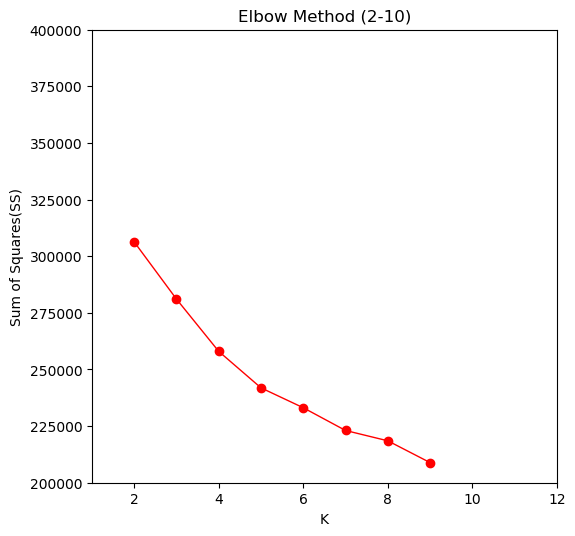

In [120]:
fig, axis = plt.subplots(1,1,figsize=(6,6),dpi=100)
_ = plt.plot(ks, ss, 'ro-', linewidth = 1.0)
_ = plt.xlim([1,12])
_ = plt.xlabel('K')
_ = plt.ylim([200000, 400000])
_ = plt.ylabel('Sum of Squares(SS)')
_ = plt.title('Elbow Method (2-10)')

In [110]:
print('inertia '+str(kmeans.inertia_))

inertia 208881.489833139


### Silhouette Method for K 

In [ ]:
fig, axis = plt.subplots(1,1,figsize=(6,6),dpi=100)
_ = plt.plot(range_n_clusters,silhouette_avgscores)
_ = plt.xlabel('$K$')
_ = plt.ylabel('Average Silhouette Score')
_ = plt.title('Average Silhouette Scores for KMeans clustering')

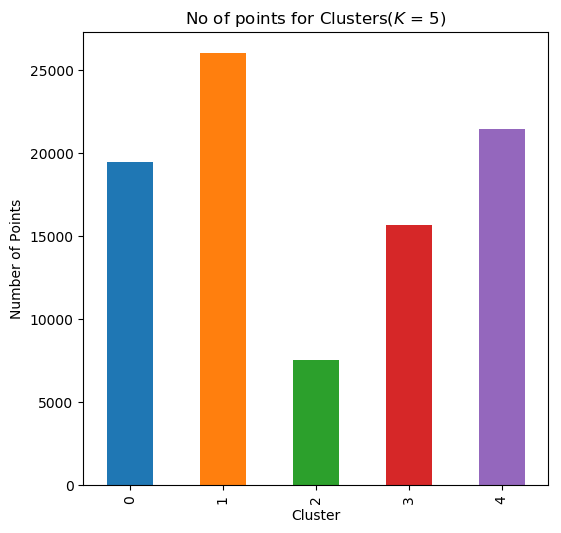

In [112]:
kmeans_val5 = KMeans(n_clusters=5, random_state=1).fit_predict(x_cols)
cluster_kmeans_val5 = pd.Series(kmeans_val5).value_counts().sort_index()
#print(cluster_kmeans_val5)

fig, axis = plt.subplots(1,1,figsize=(6,6),dpi=100)
_ = cluster_kmeans_val5.plot(kind='bar')
_ = plt.ylabel('Number of Points')
_ = plt.xlabel('Cluster')
_ = plt.title('No of points for Clusters($K$ = 5)')

### Visualizing Clusters using PCA

In [121]:
#your turn
# run the PCA with 2 components

pca = PCA(n_components = 2)
matrix = np.matrix(pca.fit_transform(x_cols))
df_pca_matrix = pd.DataFrame(matrix)
df_pca_matrix.columns = ['x','y']

# initialize dataset with names and factors
df_clusters = pd.DataFrame(df_filterdata.iloc[:,0])
df_clusters['x'], df_clusters['y'] = df_pca_matrix['x'], df_pca_matrix['y']


# calculate cluster labels
# a random state of 5 is used for consistency with the above results
clusterer = KMeans( n_clusters = 5, random_state = 5 )


# append labels to dataframe
df_clusters['cluster_label'] = clusterer.fit_predict(x_cols)

df_clusters.head()
#df_pca_matrix.head()

,index,x,y,cluster_label
0,2,0.185443,-0.901506,2
1,3,0.146349,-0.851642,2
2,4,0.206207,-0.926131,2
3,5,0.043577,0.473551,2
4,6,0.576489,0.064895,2


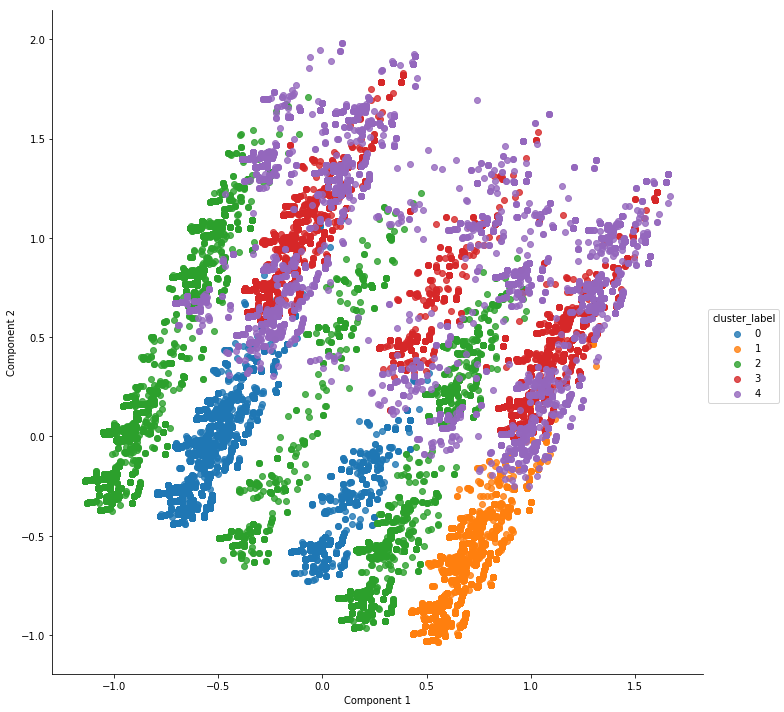

In [122]:
#plot data with seaborn
axis = sns.lmplot(data=df_clusters, x='x', y='y', hue='cluster_label', 
                   fit_reg=False, legend=True, legend_out=True,size=10)
_ = axis.set_axis_labels("Component 1", "Component 2")

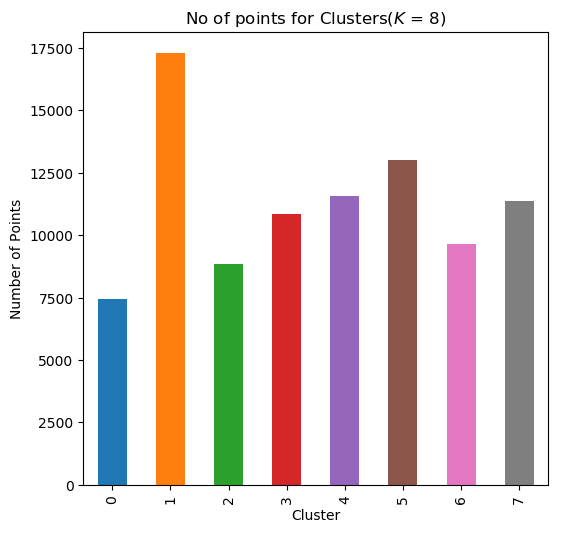

In [123]:
kmeans_val8 = KMeans(n_clusters=8, random_state=1).fit_predict(x_cols)
cluster_kmeans_val8 = pd.Series(kmeans_val8).value_counts().sort_index()
#print(cluster_kmeans_val5)

fig, axis = plt.subplots(1,1,figsize=(6,6),dpi=100)
_ = cluster_kmeans_val8.plot(kind='bar')
_ = plt.ylabel('Number of Points')
_ = plt.xlabel('Cluster')
_ = plt.title('No of points for Clusters($K$ = 8)')

### Visualizing Clusters using PCA

In [124]:
#your turn
# run the PCA with 2 components

pca = PCA(n_components = 2)
matrix = np.matrix(pca.fit_transform(x_cols))
df_pca_matrix = pd.DataFrame(matrix)
df_pca_matrix.columns = ['x','y']

# initialize dataset with names and factors
df_clusters = pd.DataFrame(df_filterdata.iloc[:,0])
df_clusters['x'], df_clusters['y'] = df_pca_matrix['x'], df_pca_matrix['y']


# calculate cluster labels
# a random state of 5 is used for consistency with the above results
clusterer = KMeans( n_clusters = 8, random_state = 5 )


# append labels to dataframe
df_clusters['cluster_label'] = clusterer.fit_predict(x_cols)

df_clusters.head()
#df_pca_matrix.head()

,index,x,y,cluster_label
0,2,0.185437,-0.901472,6
1,3,0.146349,-0.851631,3
2,4,0.206207,-0.926110,6
3,5,0.043569,0.473579,2
4,6,0.576487,0.064925,6


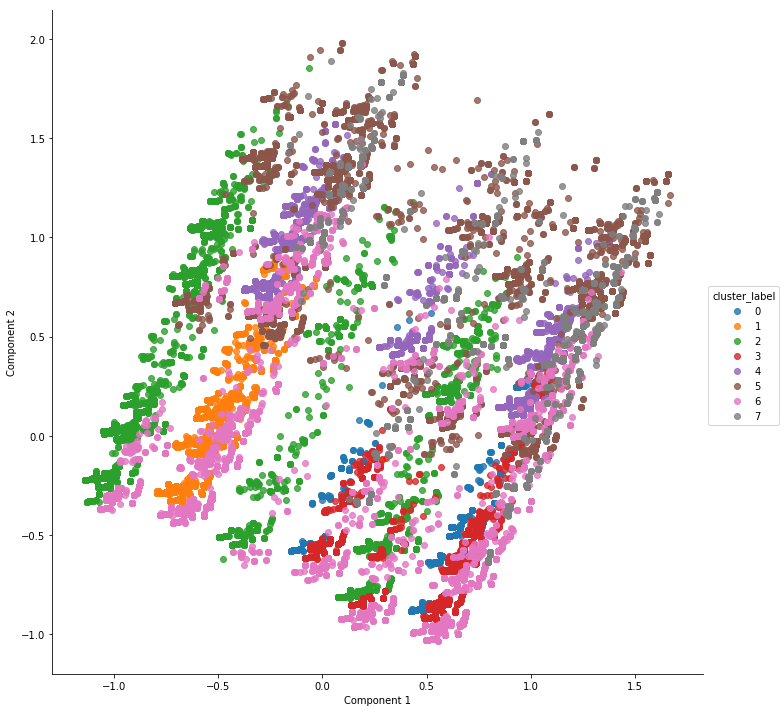

In [125]:
#plot data with seaborn
axis = sns.lmplot(data=df_clusters, x='x', y='y', hue='cluster_label', 
                   fit_reg=False, legend=True, legend_out=True,size=10)
_ = axis.set_axis_labels("Component 1", "Component 2")

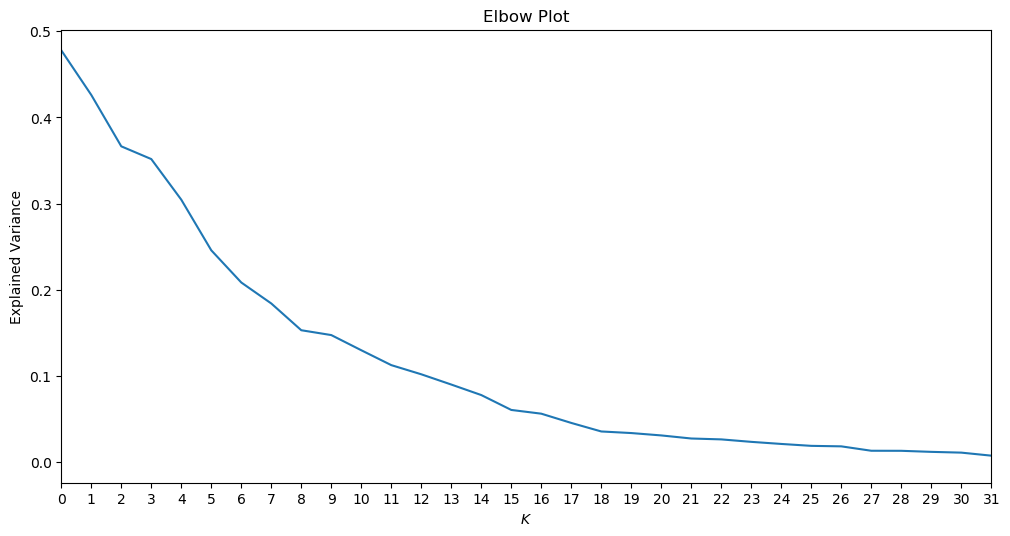

In [126]:

pca = sklearn.decomposition.PCA()
pca.fit(x_cols)

# Do the rest on your own :)
fig, axis = plt.subplots(1,1,figsize=(12,6),dpi=100)
_ = plt.plot(pca.explained_variance_)
_ = plt.xlabel('$K$')
_ = plt.xticks(range(0,33,1))
_ = plt.xlim([0,31])
_ = plt.ylabel('Explained Variance')
_ = plt.title('Elbow Plot')

In [ ]:
### need a unique column in begining for this dataframe

In [99]:
len(df_filterdata.iloc[:,0])

90000

In [42]:
df_pca_matrix.head()

,x,y
0,-0.472982,0.894823
1,-0.441698,1.143601
2,-0.446698,1.009267
3,-0.472982,0.894823
4,-0.441698,1.143601


In [43]:
df_clusters.head()

,Result,x,y
0,-1,-0.472982,0.894823
1,-1,-0.441698,1.143601
2,1,-0.446698,1.009267
3,1,-0.472982,0.894823
4,1,-0.441698,1.143601


In [100]:
t= clusterer.fit_predict(x_cols)


In [101]:
len(t)

10000

In [47]:
len(df_clusters)

31630026

In [102]:
len(x_cols)

10000

In [26]:
#help(KMeans)
#len(df_selectdata)
#df_selectdata.iloc[:200,1:].head()

In [10]:
for col in df_selectdata.columns:
    print(col)
    print(df_selectdata[col].unique())

Result
[-1  1  0]
StateCode_1.0
[0 1]
StateCode_2.0
[1 0]
StateCode_4.0
[0 1]
StateCode_5.0
[0 1]
StateCode_6.0
[0 1]
StateCode_8.0
[0 1]
StateCode_9.0
[0 1]
StateCode_10.0
[0 1]
StateCode_11.0
[0 1]
StateCode_12.0
[0 1]
StateCode_13.0
[0 1]
StateCode_15.0
[0 1]
StateCode_16.0
[0 1]
StateCode_17.0
[0 1]
StateCode_18.0
[0 1]
StateCode_19.0
[0 1]
StateCode_20.0
[0 1]
StateCode_21.0
[0 1]
StateCode_22.0
[0 1]
StateCode_23.0
[0 1]
StateCode_24.0
[0 1]
StateCode_25.0
[0 1]
StateCode_26.0
[0 1]
StateCode_27.0
[0 1]
StateCode_28.0
[0 1]
StateCode_29.0
[0 1]
StateCode_30.0
[0 1]
StateCode_31.0
[0 1]
StateCode_32.0
[0 1]
StateCode_33.0
[0 1]
StateCode_34.0
[0 1]
StateCode_35.0
[0 1]
StateCode_36.0
[0 1]
StateCode_37.0
[0 1]
StateCode_38.0
[0 1]
StateCode_39.0
[0 1]
StateCode_40.0
[0 1]
StateCode_41.0
[0 1]
StateCode_42.0
[0 1]
StateCode_44.0
[0 1]
StateCode_45.0
[0 1]
StateCode_46.0
[0 1]
StateCode_47.0
[0 1]
StateCode_48.0
[0 1]
StateCode_49.0
[0 1]
StateCode_50.0
[0 1]
StateCode_51.0
[0 1]
St